# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from sklearn.utils import shuffle
%matplotlib inline

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = y_train.shape[0]

# TODO: number of testing examples
n_test = y_test.shape[0]

# TODO: what's the shape of an image?
image_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

# TODO: how many classes are in the dataset
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


14


(32, 32, 3)

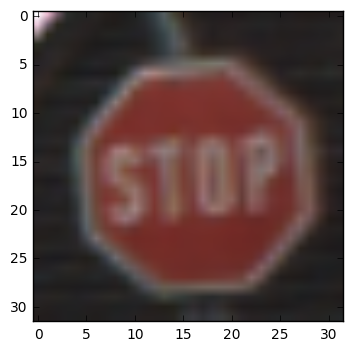

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
plt.imshow(X_train[23000])
print(y_train[23000])

X_train[58].shape

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

1
[[ 232.  255.  255. ...,  255.  255.  255.]
 [ 250.  255.  255. ...,  255.  255.  255.]
 [ 254.  255.  255. ...,  252.  251.  249.]
 ..., 
 [  39.   44.   33. ...,   18.   29.   38.]
 [  34.   53.   59. ...,   21.   30.   28.]
 [  56.   58.   50. ...,   18.   20.   21.]]


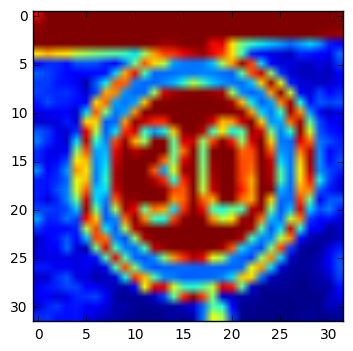

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
X_train_gray = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_gray = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

for i in range(X_train.shape[0]):
    X_train_gray[i] = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY)

for i in range(X_test.shape[0]):
    X_test_gray[i] = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2GRAY)

plt.imshow(X_train_gray[400])
print (y_train[400])
print (X_train_gray[400])

1
[[ 0.8125     0.9921875  0.9921875 ...,  0.9921875  0.9921875  0.9921875]
 [ 0.953125   0.9921875  0.9921875 ...,  0.9921875  0.9921875  0.9921875]
 [ 0.984375   0.9921875  0.9921875 ...,  0.96875    0.9609375  0.9453125]
 ..., 
 [-0.6953125 -0.65625   -0.7421875 ..., -0.859375  -0.7734375 -0.703125 ]
 [-0.734375  -0.5859375 -0.5390625 ..., -0.8359375 -0.765625  -0.78125  ]
 [-0.5625    -0.546875  -0.609375  ..., -0.859375  -0.84375   -0.8359375]]


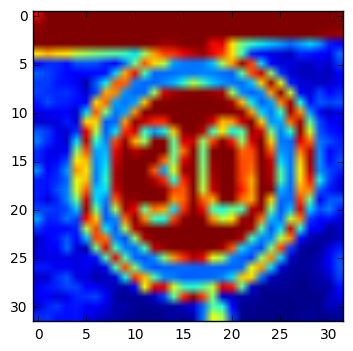

In [5]:
X_train_norm = np.divide(np.add(X_train_gray, -128), 128)
X_test_norm = np.divide(np.add(X_test_gray, -128), 128)

plt.imshow(X_train_norm[400])
print (y_train[400])
print(X_train_norm[400])

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
[[ 0.8125     0.9921875  0.9921875 ...,  0.9921875  0.9921875  0.9921875]
 [ 0.953125   0.9921875  0.9921875 ...,  0.9921875  0.9921875  0.9921875]
 [ 0.984375   0.9921875  0.9921875 ...,  0.96875    0.9609375  0.9453125]
 ..., 
 [-0.6953125 -0.65625   -0.7421875 ..., -0.859375  -0.7734375 -0.703125 ]
 [-0.734375  -0.5859375 -0.5390625 ..., -0.8359375 -0.765625  -0.78125  ]
 [-0.5625    -0.546875  -0.609375  ..., -0.859375  -0.84375   -0.8359375]]


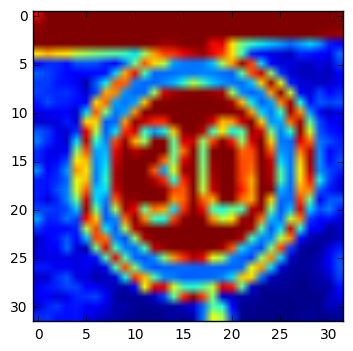

In [6]:
y_train_onehot = np.zeros(shape=(y_train.shape[0], n_classes))
y_test_onehot = np.zeros(shape=(y_test.shape[0], n_classes))

for i in range(y_train.shape[0]):
    y_train_onehot[i, y_train[i]] = 1

for i in range(y_test.shape[0]):
    y_test_onehot[i, y_test[i]] = 1

plt.imshow(X_train_norm[400])
print (y_train_onehot[400])
print (X_train_norm[400])

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**  
I used the following preprocessing techniques:  
1) Gray-scaling to reduce dimensionality of the data. Also, according to the scientific paper provided, gray-scaling may even enhance accuracy despite reduced data dimenstionality  
2) I normalized the data to make gradient descent converge faster  
3) I also used one-hot encoding for labels. This is appropriate because we are dealing with classification task

In [7]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
def shuffle_data (X_train, y_train, X_test, y_test, rs=42):
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=rs)
    X_test_shuffled, y_test_shuffled = shuffle(X_test, y_test, random_state=rs)
    return X_train_shuffled, y_train_shuffled, X_test_shuffled, y_test_shuffled

#X_train_shuffled, y_train_shuffled, X_test_shuffled, y_test_shuffled = shuffle_data (
    #X_train_gray, y_train_onehot, X_test_gray, y_test_onehot, rs=42)

#plt.imshow(X_train_shuffled[400])
#print (y_train_shuffled[400])

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**  
I used default split for train and test data

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def neural_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 32, 32, 1])
    
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)
    
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    
    fc = tf.reshape(conv2, [-1, weights['wf'].get_shape().as_list()[0]])
    fc = tf.add(tf.matmul(fc, weights['wf']), biases['bf'])
    fc = tf.nn.relu(fc)
    
    fc = tf.nn.dropout(fc, dropout)
    
    out = tf.add(tf.matmul(fc, weights['out']), biases['out'])
    #out = tf.nn.relu(out)
    
    return out

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  
Convolutional neural network with 2 convolution + pooling layers and 1 fully connected layer.
Characteristics of layers:  
1) Convolutional layer which takes input as a 2D 32x32 matrix and outputs 3D 32x32x32 matrix. Filter uses 5x5 patches with same padding and stride=1  
2) Pooling layer which uses max pooling with 2x2 pooling window, stride=1 and same padding producing 16x16x32 matrix
3) Convolutional layer taking a 16x16x32 matrix as an input and outputting 16x16x64 matrix using 5x5 patches, same padding and stride=1  
4) Pooling layer using max pooling with 2x2 pooling window, stride=1 and same padding producing 8x8x64 matrix  
5) Fully-connected layer with 4096 neurons taking 8x8x64 matrix as an input  
6) Output layer connecting 4096 neurons to 43 output values

In [9]:
### Train your model here.
### Feel free to use as many code cells as needed.
learning_rate = 0.001
training_iters = n_train
batch_size = 128
epochs = 3

n_input = 1024 
n_classes = 43 
dropout = 0.5

display_step = 100

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

In [10]:
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wf': tf.Variable(tf.random_normal([8*8*64, 4096])),
    'out': tf.Variable(tf.random_normal([4096, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bf': tf.Variable(tf.random_normal([4096])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [11]:
pred = neural_net(x, weights, biases, keep_prob)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.initialize_all_variables()

In [12]:
sess = tf.Session()

sess.run(init)

for i in range(epochs):
    step = 1
    
    X_train_shuffled, y_train_shuffled, X_test_shuffled, y_test_shuffled = shuffle_data (
        X_train_norm, y_train_onehot, X_test_norm, y_test_onehot, rs=i+100)
    
    while step * batch_size < training_iters:
        batch_x = np.reshape(X_train_shuffled[(step-1)*batch_size:step*batch_size], (batch_size, 1024))
        batch_y = np.reshape(y_train_shuffled[(step-1)*batch_size:step*batch_size], (batch_size, 43))
        
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
            
        if step % display_step == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                   "{:.6f}".format(loss) + ", Training Accuracy= " + \
                   "{:.5f}".format(acc))
            print ("Testing Accuracy:", \
                   sess.run(accuracy, feed_dict={x: np.reshape(X_test_shuffled[:256], (256, 1024)),
                                                 y: np.reshape(y_test_shuffled[:256], (256, 43)),
                                                 keep_prob: 1.}))
        step += 1
    
    print ("Epoch Finished!")
    print ("Testing Accuracy:", \
           sess.run(accuracy, feed_dict={x: np.reshape(X_test_shuffled[:1024], (1024, 1024)),
                                         y: np.reshape(y_test_shuffled[:1024], (1024, 43)),
                                         keep_prob: 1.}))
print("Optimization Finished!")
    
X_train_shuffled, y_train_shuffled, X_test_shuffled, y_test_shuffled = shuffle_data (
    X_train_norm, y_train_onehot, X_test_norm, y_test_onehot, rs=42)

print ("Testing Accuracy:", \
       sess.run(accuracy, feed_dict={x: np.reshape(X_test_shuffled[:1024], (1024, 1024)),
                                     y: np.reshape(y_test_shuffled[:1024], (1024, 43)),
                                     keep_prob: 1.}))

Iter 12800, Minibatch Loss= 34132.636719, Training Accuracy= 0.29688
Testing Accuracy: 0.253906
Iter 25600, Minibatch Loss= 10933.816406, Training Accuracy= 0.44531
Testing Accuracy: 0.324219
Iter 38400, Minibatch Loss= 8964.539062, Training Accuracy= 0.42969
Testing Accuracy: 0.394531
Epoch Finished!
Testing Accuracy: 0.371094
Iter 12800, Minibatch Loss= 5633.088867, Training Accuracy= 0.52344
Testing Accuracy: 0.472656
Iter 25600, Minibatch Loss= 4155.238281, Training Accuracy= 0.55469
Testing Accuracy: 0.5
Iter 38400, Minibatch Loss= 2874.131592, Training Accuracy= 0.67969
Testing Accuracy: 0.542969
Epoch Finished!
Testing Accuracy: 0.491211
Iter 12800, Minibatch Loss= 2369.717285, Training Accuracy= 0.64844
Testing Accuracy: 0.546875
Iter 25600, Minibatch Loss= 1219.954346, Training Accuracy= 0.71875
Testing Accuracy: 0.542969
Iter 38400, Minibatch Loss= 1647.537598, Training Accuracy= 0.76562
Testing Accuracy: 0.5625
Epoch Finished!
Testing Accuracy: 0.557617
Optimization Finished

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  
I used:  
learning rate = 0.001  
batch size = 128  
epochs = 3  
dropout = 0.5  
optimizer = adam

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**  
I took DeepMNIST tutorial as an example architecture and tuned hyperparameters to validation set, then tested on a test set.  
Before arriving at current architecture I tried plain neural network (no convolution / pooling layers) and convolutional network with 1 convolutional + pooling layer. Both these architectures didnt work very well. With small number of neurons they didnt work well. When I increased the amount of neurons, performance somewhat improved, but it took forever to train the model. So I arrived at current architecture which strikes a balance between speed of learning and accuracy. I didnt try recurrent neural networks for this task, because as far as I know they are primarily for time-series processing.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from PIL import Image

img1 = Image.open('new1')
img2 = Image.open('new2')
img3 = Image.open('new3')
img4 = Image.open('new4')
img5 = Image.open('new5')

img1.thumbnail((32, 32), Image.ANTIALIAS)
img2.thumbnail((32, 32), Image.ANTIALIAS)
img3.thumbnail((32, 32), Image.ANTIALIAS)
img4.thumbnail((32, 32), Image.ANTIALIAS)
img5.thumbnail((32, 32), Image.ANTIALIAS)

x1 = np.array(img1)
x2 = np.array(img2)
x3 = np.array(img3)
x4 = np.array(img4)
x5 = np.array(img5)

x1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)
x2 = cv2.cvtColor(x2, cv2.COLOR_BGR2GRAY)
x3 = cv2.cvtColor(x3, cv2.COLOR_BGR2GRAY)
x4 = cv2.cvtColor(x4, cv2.COLOR_BGR2GRAY)
x5 = cv2.cvtColor(x5, cv2.COLOR_BGR2GRAY)

x1 = np.divide(np.add(x1, -128), 128)
x2 = np.divide(np.add(x2, -128), 128)
x3 = np.divide(np.add(x3, -128), 128)
x4 = np.divide(np.add(x4, -128), 128)
x5 = np.divide(np.add(x5, -128), 128)

x10 = np.reshape(x1, (1,1024))
x20 = np.reshape(x2, (1,1024))
x30 = np.reshape(x3, (1,1024))
x40 = np.reshape(x4, (1,1024))
x50 = np.reshape(x5, (1,1024))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**  
Please see answer and visualizations in the cells below

'\nThis is an example image of a stop sign.\nI think it would be pretty easy to classify because the sign is nicely centered\nand there is no noise in the picture\n'

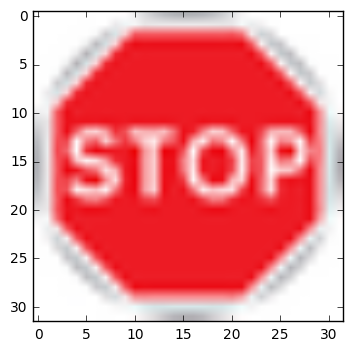

In [14]:
plt.imshow(img1)
'''
This is an example image of a stop sign.
I think it would be pretty easy to classify because the sign is nicely centered
and there is no noise in the picture
'''

'\nThis is a an example "slippery road" sign. I think this will be harder to classify\nbecause graphic is rather complex and it could be confused with other images.\n'

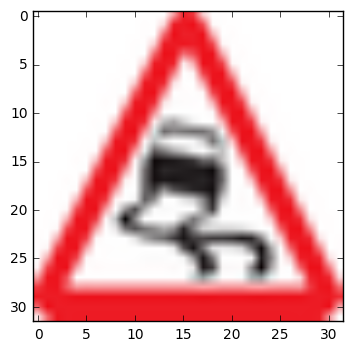

In [15]:
plt.imshow(img2)
'''
This is a an example "slippery road" sign. I think this will be harder to classify
because graphic is rather complex and it could be confused with other images.
'''

"\nThis is an example of 'no entry' sign. I think it will be classified pretty easily\nbecause it has a very simple and distinctive graphic shape\n"

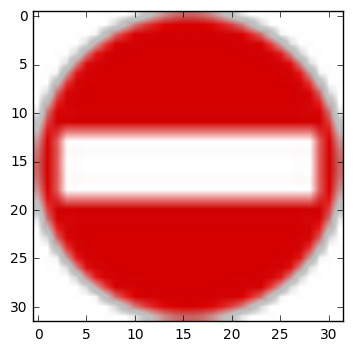

In [16]:
plt.imshow(img3)
'''
This is an example of 'no entry' sign. I think it will be classified pretty easily
because it has a very simple and distinctive graphic shape
'''

"\nThis is a photo of 'stop' sign in live environment.\nI expect that prediction wont be as accurate as for example image with no noise\n"

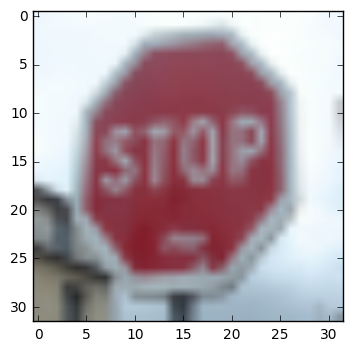

In [17]:
plt.imshow(img4)
'''
This is a photo of 'stop' sign in live environment.
I expect that prediction wont be as accurate as for example image with no noise
'''

"\nThis is an example of 'speed limit 30' sign.\nThis could be difficult to classify due to additional text ('zone') which could confuse classifier\n"

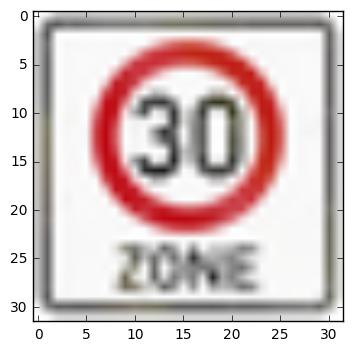

In [18]:
plt.imshow(img5)
'''
This is an example of 'speed limit 30' sign.
This could be difficult to classify due to additional text ('zone') which could confuse classifier
'''

In [19]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
preds1 = neural_net(x10.astype('float32'), weights, biases, 1.0).eval(session=sess)
preds2 = neural_net(x20.astype('float32'), weights, biases, 1.0).eval(session=sess)
preds3 = neural_net(x30.astype('float32'), weights, biases, 1.0).eval(session=sess)
preds4 = neural_net(x40.astype('float32'), weights, biases, 1.0).eval(session=sess)
preds5 = neural_net(x50.astype('float32'), weights, biases, 1.0).eval(session=sess)

print ("predicted:",np.argmax(preds1), "true:", 14)
print ("predicted:",np.argmax(preds2), "true:", 23)
print ("predicted:",np.argmax(preds3), "true:", 17)
print ("predicted:",np.argmax(preds4), "true:", 14)
print ("predicted:",np.argmax(preds5), "true:", 1)

predicted: 14 true: 14
predicted: 14 true: 23
predicted: 17 true: 17
predicted: 14 true: 14
predicted: 13 true: 1


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**  
The model performs with about ~60% accuracy on testing set.  
It performs about as well on new pictures (on example 5 pictures accuracy is 3/5 = 20%). This accuracy may be a bit overexaggerated though, because I used rather simple images

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
relu1 = preds1 * (preds1 > 0) / 10000
relu2 = preds2 * (preds2 > 0) / 10000
relu3 = preds3 * (preds3 > 0) / 10000
relu4 = preds4 * (preds4 > 0) / 10000
relu5 = preds5 * (preds5 > 0) / 10000

sm1 = np.exp(relu1) / np.sum(np.exp(relu1), axis=1)
sm2 = np.exp(relu2) / np.sum(np.exp(relu2), axis=1)
sm3 = np.exp(relu3) / np.sum(np.exp(relu3), axis=1)
sm4 = np.exp(relu4) / np.sum(np.exp(relu4), axis=1)
sm5 = np.exp(relu5) / np.sum(np.exp(relu5), axis=1)

args1 = sm1.argsort()[:,38:43].T[::-1]
args2 = sm2.argsort()[:,38:43].T[::-1]
args3 = sm3.argsort()[:,38:43].T[::-1]
args4 = sm4.argsort()[:,38:43].T[::-1]
args5 = sm5.argsort()[:,38:43].T[::-1]

probs1 = sm1[:,args1]
probs2 = sm2[:,args2]
probs3 = sm3[:,args3]
probs4 = sm4[:,args4]
probs5 = sm5[:,args5]

print('Pic1, true label =', 14)
print (args1)
print (probs1)

print('Pic2, true label =', 23)
print (args2)
print (probs2)

print('Pic3, true label =', 17)
print (args3)
print (probs3)

print('Pic4, true label =', 14)
print (args4)
print (probs4)

print('Pic5, true label =', 1)
print (args5)
print (probs5)

Pic1, true label = 14
[[14]
 [33]
 [17]
 [ 3]
 [ 2]]
[[[ 0.72265756]
  [ 0.14372467]
  [ 0.02714745]
  [ 0.0134302 ]
  [ 0.01178159]]]
Pic2, true label = 23
[[14]
 [11]
 [21]
 [23]
 [19]]
[[[ 0.53017551]
  [ 0.42890331]
  [ 0.00925541]
  [ 0.00379178]
  [ 0.00341508]]]
Pic3, true label = 17
[[17]
 [14]
 [39]
 [35]
 [24]]
[[[  9.93100047e-01]
  [  2.49369629e-03]
  [  1.72017294e-03]
  [  9.78650642e-04]
  [  4.04662831e-04]]]
Pic4, true label = 14
[[14]
 [13]
 [40]
 [25]
 [17]]
[[[ 0.18105116]
  [ 0.09900389]
  [ 0.08379067]
  [ 0.06724727]
  [ 0.05947746]]]
Pic5, true label = 1
[[13]
 [ 0]
 [11]
 [22]
 [21]]
[[[ 0.4277131 ]
  [ 0.31625623]
  [ 0.02994755]
  [ 0.02173086]
  [ 0.02115452]]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**  
Pic1 prediction is correct with good confidence (~0.72). This is a rather simple picture with almost no noise though  

Pic2 prediction is incorrect, but true label appears in top 5 (with very low confidence though). I think this is due to the complexity of shapes in this particular sign.  

Pic3 prediction is correct with excellent confidence. This is super simple image with clear geometric shapes, so I guess this is expected  

Pic4 prediction is correct, but with very low confidence. I think this is due to the fact that this image is taken from real-world conditions rather than from example pictures set.  

Pic5 is incorrect and doesnt appear in top 5. But, interestingly, analogous sign (20 km/h speed limit) is top-2 prediction

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.